<a href="https://colab.research.google.com/github/aderdouri/ActuarialThesis/blob/master/Notebooks/myExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Mon mémoire d'actuariat est accompagné d'un code organisé en `notebooks` pour faciliter la présentation et l'accessibilité. Ce code est stocké dans un repository `Github` sous le nom `ActuarialThesis`. Ce repository contient les notebooks suivants :
- Le dataset originale et le dataset transformée
- L'ensemble des notebooks suivants à considérer dans l'ordre:
  - `myExploratoryDataAnalysis.ipynb`
  - `myAllstateDataAnalysis2012.ipynb` (Pour des propos de comparaison)
  - `myAllstateDataAnalysis2016.ipynb` (Pour des propos de comparaison)
  - `myFrenchMotorThirdPartyLiabilityClaimsDataAnalysis.ipynb` (Pour des propos de comparaison)
  - `myAutoPortfolioEncoding.ipynb`
  - `myXGBoostClassifier.ipynb`
  - `myCatBoostClassifier.ipynb`
  - `myLightGBMClassifier.ipynb`
  - `myXGBoostRegressor.ipynb`
  - `myLightGBMRegressor.ipynb`
  - `myCatBoostRegressor.ipynb`

Ces notebooks s'execuent sur `google colab (https://colab.research.google.com/)`, simplement avec les installations spécifiés dans ces notebooks.

Une autre partie du code est un code en langage de programmation `R`, une note explicative y sera consacré dans un notebook dédié.

## Cloner la branche contenant le dataset et le code qui va avec.

In [1]:
!rm -rf ActuarialThesis

In [2]:
!git clone https://github.com/aderdouri/ActuarialThesis.git

Cloning into 'ActuarialThesis'...
remote: Enumerating objects: 1029, done.
remote: Counting objects: 100% (312/312), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 1029 (delta 163), reused 221 (delta 107), pack-reused 717
Receiving objects: 100% (1029/1029), 129.94 MiB | 34.01 MiB/s, done.
Resolving deltas: 100% (453/453), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [4]:
sns.set_theme()

In [5]:
!ls -ltr ActuarialThesis/Data

total 44752
-rw-r--r-- 1 root root   562212 Oct 31 07:09 BASEAUTO.csv
-rw-r--r-- 1 root root   201188 Oct 31 07:09 df_models.csv
-rw-r--r-- 1 root root  3263186 Oct 31 07:09 encodedBASEAUTO.csv
-rw-r--r-- 1 root root  3273326 Oct 31 07:09 encodedCategoricalBASEAUTO.csv
-rw-r--r-- 1 root root  2236112 Oct 31 07:09 encodedTDboostEMTDboost.csv
-rw-r--r-- 1 root root   698687 Oct 31 07:09 encodedTestBASEAUTO.csv
-rw-r--r-- 1 root root  2792067 Oct 31 07:09 encodedTrainBASEAUTO.csv
-rw-r--r-- 1 root root 31528920 Oct 31 07:09 freMTPL2freq.csv
-rw-r--r-- 1 root root   403127 Oct 31 07:09 freMTPL2sev.csv
-rw-r--r-- 1 root root   846739 Oct 31 07:09 transformedBASEAUTO.csv


Notre dataset `BASEAUTO` est obtenu en format `.csv`. Nous utliserons le package python `pandas` pour l'analyser.

In [6]:
df = pd.read_csv('ActuarialThesis/Data/BASEAUTO.csv')
df.head()

,PERMIS,ACV,SEX,STATUT,CSP,USAGE,AGECOND,K8000,RM,CAR,CLA,ALI,ENE,VIT,SEGM,CHARGE,GARAGE
0,245,10,F,C,50,2,40,N,64,BER,A,CAR,ES,130-140,A,0.0,3
1,348,10,F,A,50,1,63,N,50,BER,A,CAR,ES,001-130,0,0.0,3
2,16,10,F,C,26,2,20,N,95,BER,A,CAR,ES,001-130,0,0.0,3
3,291,10,F,A,50,1,56,N,50,BER,A,CAR,ES,001-130,0,0.0,3
4,123,10,F,A,50,1,29,N,95,BER,A,CAR,ES,140-150,B,0.0,3


In [7]:
len(df.columns)

17

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10496 entries, 0 to 10495
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMIS   10496 non-null  int64  
 1   ACV      10496 non-null  int64  
 2   SEX      10496 non-null  object 
 3   STATUT   10496 non-null  object 
 4   CSP      10496 non-null  int64  
 5   USAGE    10496 non-null  int64  
 6   AGECOND  10496 non-null  int64  
 7   K8000    10496 non-null  object 
 8   RM       10496 non-null  int64  
 9   CAR      10496 non-null  object 
 10  CLA      10496 non-null  object 
 11  ALI      10496 non-null  object 
 12  ENE      10496 non-null  object 
 13  VIT      10496 non-null  object 
 14  SEGM     10496 non-null  object 
 15  CHARGE   10496 non-null  float64
 16  GARAGE   10496 non-null  int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 1.4+ MB


Le dataset contient des caractéristiques continues et d'autres catégorielles. Ceraines caractéristiques se présentent en tant que variables continues et elle ne le sont pas en réalité. On reviendera sur ces caractéristiques dans un deuxième temps.

In [9]:
df.describe()

,PERMIS,ACV,CSP,USAGE,AGECOND,RM,CHARGE,GARAGE
count,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000,10496.000000
mean,298.886623,5.963319,47.872999,1.827172,46.752668,65.820884,244.081456,2.624333
std,162.418996,3.556940,13.170649,0.757776,14.755372,19.358909,1406.173730,0.659142
min,1.000000,0.000000,1.000000,1.000000,19.000000,50.000000,0.000000,1.000000
25%,163.750000,2.000000,50.000000,1.000000,34.000000,50.000000,0.000000,2.000000
50%,281.000000,7.000000,50.000000,2.000000,45.000000,57.000000,0.000000,3.000000
75%,422.000000,10.000000,50.000000,2.000000,57.000000,80.000000,0.000000,3.000000
max,940.000000,10.000000,91.000000,4.000000,103.000000,258.000000,67261.167370,3.000000


In [10]:
len(df[df.duplicated()==True]) / len(df)

0.00038109756097560977

In [11]:
# Vérification de la proportion des valeurs manquantes
df.isna().sum()/len(df)

PERMIS     0.0
ACV        0.0
SEX        0.0
STATUT     0.0
CSP        0.0
USAGE      0.0
AGECOND    0.0
K8000      0.0
RM         0.0
CAR        0.0
CLA        0.0
ALI        0.0
ENE        0.0
VIT        0.0
SEGM       0.0
CHARGE     0.0
GARAGE     0.0
dtype: float64

## Analyse de la variable cible (Target variable)
La variable cible ou `target` qu'on souhaite prédire est la variable `CHARGE`.

In [12]:
df['CHARGE'].describe(percentiles=[])

count    10496.000000
mean       244.081456
std       1406.173730
min          0.000000
50%          0.000000
max      67261.167370
Name: CHARGE, dtype: float64

In [13]:
CHARGE_df = pd.concat({'CHARGE': df['CHARGE'].describe(percentiles=[]),
                       'CHARGE>0': df[df['CHARGE']>0]['CHARGE'].describe(percentiles=[]),
                       'CHARGE==0': df[df['CHARGE']==0]['CHARGE'].describe(percentiles=[])
                       },
                      axis=1)
CHARGE_df

,CHARGE,CHARGE>0,CHARGE==0
count,10496.000000,1398.000000,9098.0
mean,244.081456,1832.531448,0.0
std,1406.173730,3455.681641,0.0
min,0.000000,3.464048,0.0
50%,0.000000,943.758761,0.0
max,67261.167370,67261.167370,0.0


In [14]:
df[df['CHARGE']>0]['CHARGE'].count() / len(df)

0.1331935975609756

In [15]:
np.round(100*len(df[df['CHARGE']>0]) / len(df), 4)

13.3194

Uniquement `13.32%` des montants de sinistres sont strictement supérieurs à zéros.

In [16]:
np.round(100*len(df[df['CHARGE']==0]) / len(df), 4)

86.6806

`86.68%` des montants de sinistres sont égales à zéros.

In [17]:
a = df['CHARGE'].skew()
print('Skewness de la caractéristique CHARGE :', a)

Skewness de la caractéristique CHARGE : 20.10623729632222


La caractéristique `CHARGE` présente un skewness élevé.

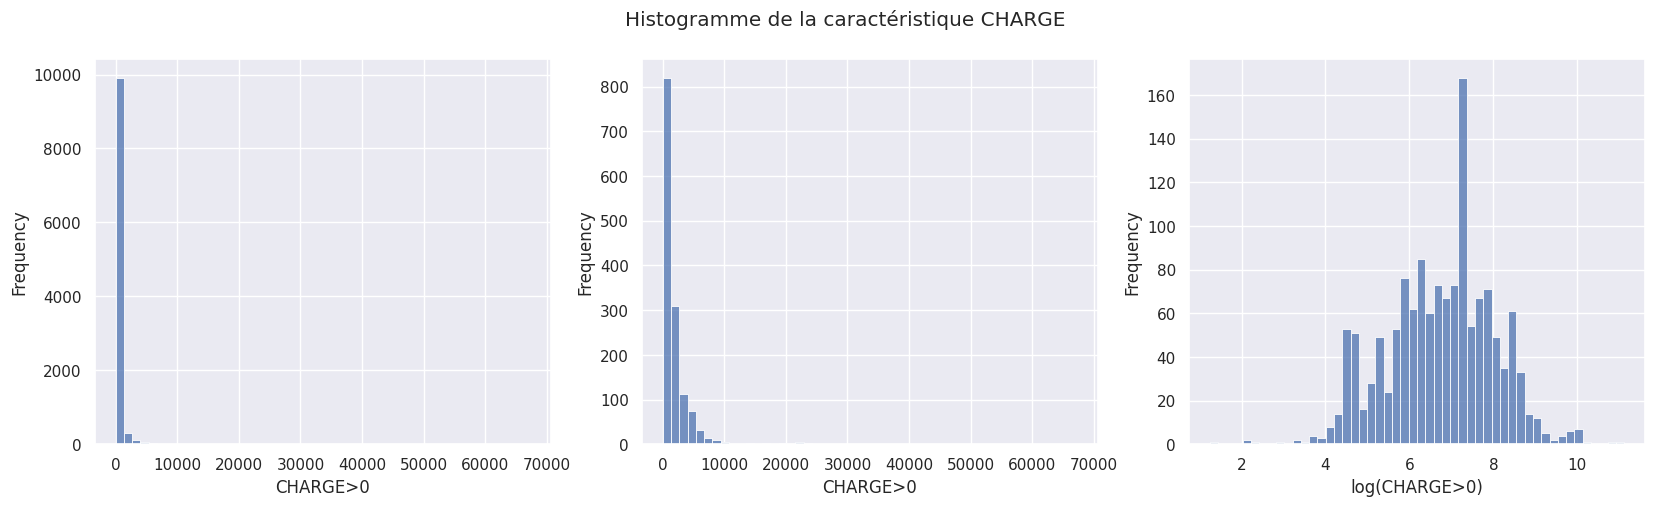

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Histogramme de la caractéristique CHARGE')

sns.histplot(ax=ax1, data=df['CHARGE'], bins=50)
ax1.set(xlabel='CHARGE>0', ylabel='Frequency')

sns.histplot(ax=ax2, data=df[df['CHARGE']>0]['CHARGE'], bins=50)
ax2.set(xlabel='CHARGE>0', ylabel='Frequency')

sns.histplot(ax=ax3, data=np.log(df[df['CHARGE']>0]['CHARGE']), bins=50)
ax3.set(xlabel='log(CHARGE>0)', ylabel='Frequency')
plt.savefig('ActuarialThesis/Plots/myHistogramCHARGE.pdf');

In [19]:
num_cols = ['PERMIS',	'ACV', 'AGECOND', 'RM','CHARGE']
describe_num_df = df[num_cols].describe()
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']

In [20]:
#Set general font size
#plt.rcParams['font.size'] = '100'
#sns.set(font_scale=1.5)

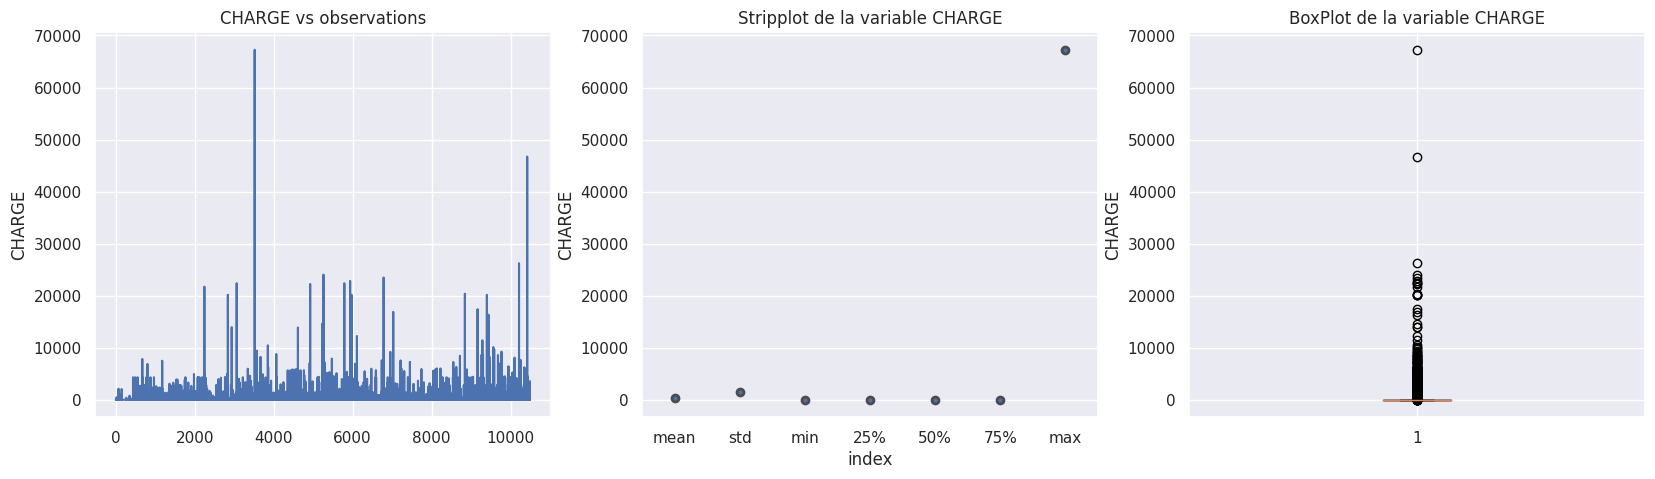

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

idx = df.index
ax1.plot(idx, df['CHARGE'])
ax1.set_ylabel('CHARGE')
ax1.set_title('CHARGE vs observations')

sns.stripplot(x='index', y='CHARGE', data=describe_num_df, jitter=True, linewidth=2, size=5, ax=ax2)
ax2.set_ylabel('CHARGE')
ax2.set_title('Stripplot de la variable CHARGE')

ax3.boxplot(df['CHARGE'])
ax3.set_ylabel('CHARGE')
ax3.set_title('BoxPlot de la variable CHARGE')

plt.savefig('ActuarialThesis/Plots/myBoxPlotCHARGE.pdf');

* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique `CHARGE`, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur les performances en terme de temps d'éxecution, mais vu la taille de notre portefeuille, ce problème ne devrait pas nous poser beaucoup de problèmes.

## Calculate skewness and see how we can reduce skewness.

* Nous pouvons immédiatement remarquer que la plupart des valeurs des 25, 50 et 75e percentiles sont très faibles. Il y a quelques points où la perte est très élevée, habituellement nous les traitons comme des valeurs aberrantes, mais dans ce cas nous devons les traiter car l'entreprise a subi une perte énorme à ce moment-là.

In [22]:
df['logloss'] = np.log(df[df['CHARGE']>0]['CHARGE'])
print('Skewness of CHARGE feature after applying log function sur les charges positives :', df['logloss'].skew())
df = df.drop(['logloss'],axis = 1)

Skewness of CHARGE feature after applying log function sur les charges positives : -0.21552653402856872


* Nous avons appliqué la transformation logarithmique à la variable `CHARGE` (partie strictement positive) et nous avons remarqué que l'asymétrie avait beaucoup diminué.

## Séparation variables catégoriques vs variables numériques.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10496 entries, 0 to 10495
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMIS   10496 non-null  int64  
 1   ACV      10496 non-null  int64  
 2   SEX      10496 non-null  object 
 3   STATUT   10496 non-null  object 
 4   CSP      10496 non-null  int64  
 5   USAGE    10496 non-null  int64  
 6   AGECOND  10496 non-null  int64  
 7   K8000    10496 non-null  object 
 8   RM       10496 non-null  int64  
 9   CAR      10496 non-null  object 
 10  CLA      10496 non-null  object 
 11  ALI      10496 non-null  object 
 12  ENE      10496 non-null  object 
 13  VIT      10496 non-null  object 
 14  SEGM     10496 non-null  object 
 15  CHARGE   10496 non-null  float64
 16  GARAGE   10496 non-null  int64  
dtypes: float64(1), int64(7), object(9)
memory usage: 1.4+ MB


Les caractéristiques `CSP`, `USAGE` et `GARAGE`, même s'ils sont présente dans le dataset en tant que variables continues, elles sont à considérer comme caractéristiques catégorielles. La caratéristique `ACV` peut aussi être considérée comme catégorique (Nous y revienderons sur son split plutard). Nous les considérons ainsi avant de continuer notre analyse describtive du dataset.

In [24]:
df['CSP'] = df['CSP'].astype('object')
df['USAGE'] = df['USAGE'].astype('object')
df['GARAGE'] = df['GARAGE'].astype('object')
#df['ACV'] = df['ACV'].astype('object')

In [25]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
print("Categorical features in Train data : {} features".format(len(categorical_features)))

Categorical features in Train data : 12 features


In [26]:
continous_features = [i for i in list(df.select_dtypes(include=['float64', 'int64']).columns) if i not in ['CHARGE']]
print("Continuous features in Train data : {} features".format(len(continous_features)))

Continuous features in Train data : 4 features


## Vérification des valeurs manquantes (missing values) dans train dataset.

In [27]:
print('Missing values in Train data:', pd.isnull(df).values.any())

Missing values in Train data: False


## Valeurs uniques dans les caractéristiques catégorielles
Déterminer le nombre de valeurs uniques présentes dans chaque caractéristique catégorielle et les charger dans un dataframe.

In [28]:
unique_in_categorical = []
for i in categorical_features:
    unique_in_categorical.append(len(df[i].unique()))

# Création d'un dataframe contenant le nombre de valeurs uniques et les noms des caractéristiques correspondantes.
unique_categories = pd.DataFrame()
unique_categories['category name'] = categorical_features
unique_categories['unique_values'] = unique_in_categorical
unique_categories = unique_categories.sort_values(by=['unique_values'], ascending=True)
unique_categories

,category name,unique_values
0,SEX,2
1,STATUT,2
4,K8000,2
8,ENE,3
11,GARAGE,3
3,USAGE,4
7,ALI,5
10,SEGM,6
5,CAR,9
9,VIT,10


In [29]:
a=max(unique_categories['unique_values'])
print('Le nombre maximum de valeurs uniques dans une seule caractéristique catégorielle est de :',a)

Le nombre maximum de valeurs uniques dans une seule caractéristique catégorielle est de : 26


## Vérification de la fonction DESCRIBE pour les caractéristiques continues.

In [30]:
df[continous_features].describe()

,PERMIS,ACV,AGECOND,RM
count,10496.000000,10496.000000,10496.000000,10496.000000
mean,298.886623,5.963319,46.752668,65.820884
std,162.418996,3.556940,14.755372,19.358909
min,1.000000,0.000000,19.000000,50.000000
25%,163.750000,2.000000,34.000000,50.000000
50%,281.000000,7.000000,45.000000,57.000000
75%,422.000000,10.000000,57.000000,80.000000
max,940.000000,10.000000,103.000000,258.000000


## Vérification de la correlation entre les caractéristiques continues.

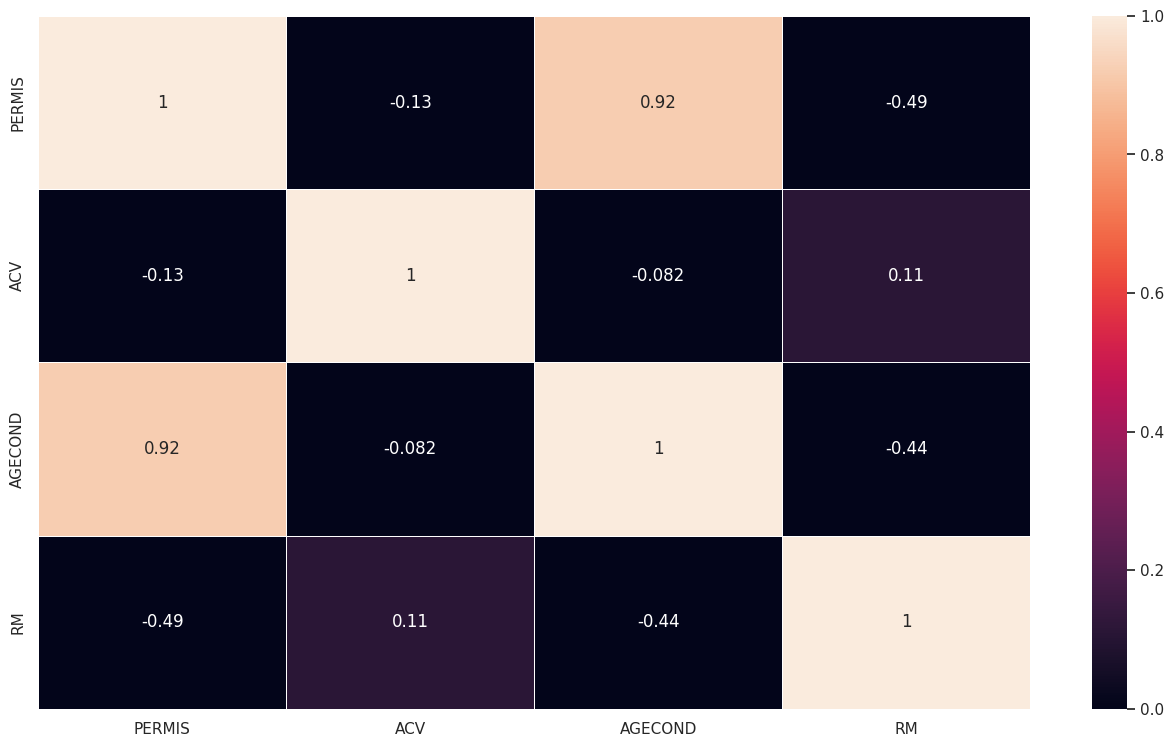

In [31]:
plt.subplots(figsize=(16, 9))
correlation_matrix = df[continous_features].corr()
sns.heatmap(correlation_matrix, annot=True,vmin=0, vmax=1,linewidths=.5)
plt.savefig('ActuarialThesis/Plots/myCorrelation.pdf');

In [32]:
import itertools
combinations = list(itertools.combinations(continous_features, 2))
print(combinations)

[('PERMIS', 'ACV'), ('PERMIS', 'AGECOND'), ('PERMIS', 'RM'), ('ACV', 'AGECOND'), ('ACV', 'RM'), ('AGECOND', 'RM')]


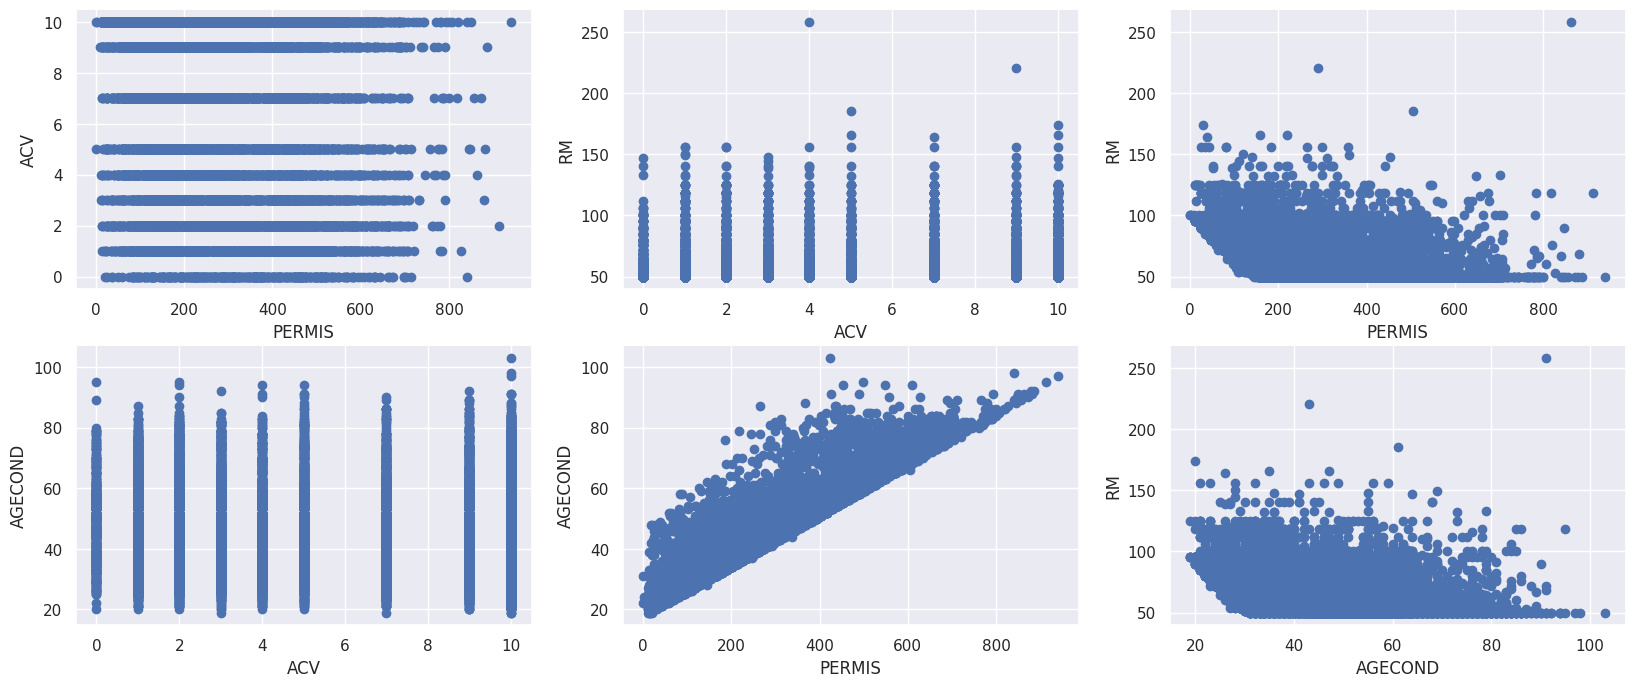

In [33]:
f, ax = plt.subplots(2, 3, figsize=(20, 8))

for i, name in enumerate(combinations):
    ax[i%2][i%3].scatter(df[name[0]], df[name[1]])
    ax[i%2][i%3].set_xlabel(name[0])
    ax[i%2][i%3].set_ylabel(name[1])
plt.savefig('ActuarialThesis/Plots/myCorrelationPlot.pdf');

On observe une forte correlation entre les deux caractéristiques `AGECOND` et `PERMIS`.

In [34]:
def num_plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(16, 5))

    sns.histplot(x=col, data=df, ax=ax1)
    ax1.set_title(col + ' histplot', fontsize=10)
    ax1.set_xlabel(col, fontsize=10)

    sns.boxplot(x=col, data=df, ax=ax2, orient='y')
    ax2.set_title(col + ' boxplot', fontsize=10)
    ax2.set(yticks=[])

    sns.scatterplot(y='CHARGE', x=col, data=df, ax=ax3)
    ax3.set_title(col + ' scatterplot', fontsize=10)

    plt.savefig('ActuarialThesis/Plots/my'+col+'Plot'+'.pdf');
    plt.tight_layout()
    plt.show()

### Caractéristique `RM` (Bonus/Malus ou Réduction Majoration)

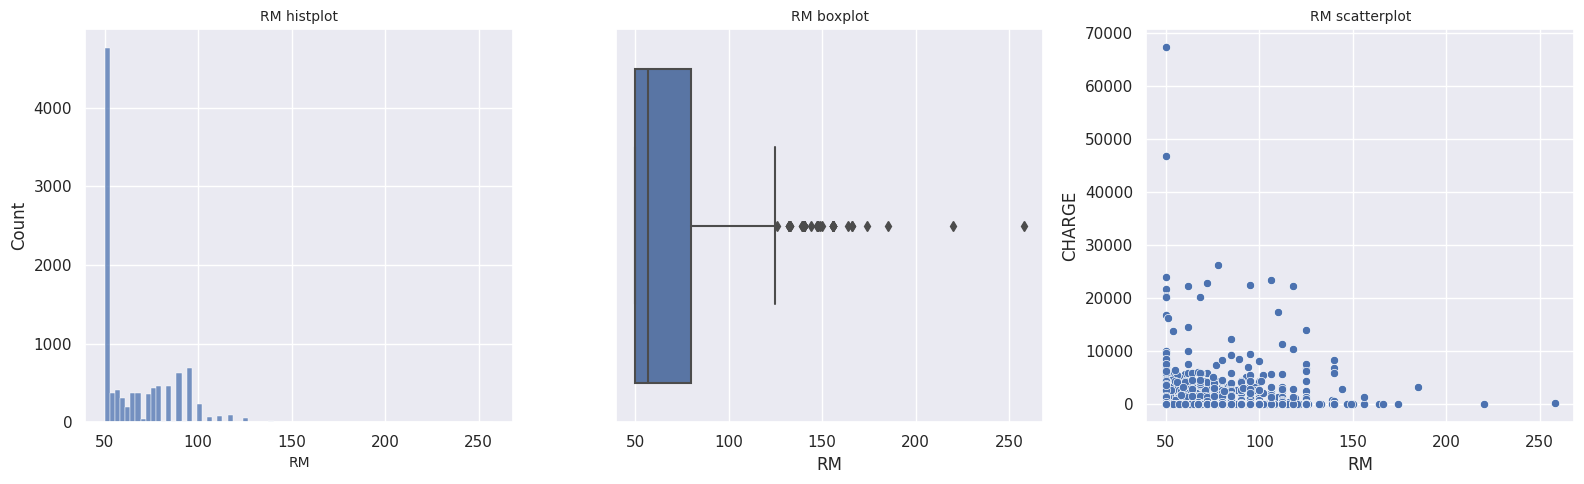

In [36]:
num_plot(df, 'RM');

### Caractéristique `PERMIS`

In [37]:
df['PERMIS'].unique()

array([245, 348,  16, 291, 123, 295,  24, 181, 157, 338,  20, 208, 127,
        93, 134, 416, 383, 417, 460,  38, 381, 212, 276, 463, 130, 142,
       330, 622, 139, 102, 230, 465, 296, 132, 144, 262, 162, 221,  97,
       209, 335,  96,  12,  52,  84, 266, 412, 677, 120,  19, 165, 422,
       439, 227, 121,  61, 151, 118,  75, 110, 506,  81, 448, 437, 224,
       453,  73, 119,  74, 196, 388, 161, 367, 342, 292, 378, 190,  25,
       112, 156, 141, 150, 169, 401, 387, 414, 440, 294, 186, 270, 149,
       490, 604, 182, 333, 423, 192, 253, 469, 573, 220,  95, 343, 126,
       201, 214, 234, 441, 154, 339, 395, 364,  33,  30, 514, 265, 402,
       462, 390, 183, 420,  91, 277,  17, 518, 278,  48, 184, 623, 346,
       365, 247, 321, 188, 189, 505, 311, 155, 501, 133, 250,  90, 480,
       232, 263, 322, 345, 539,  14, 145, 210, 404,  29, 187,  57,  37,
       239, 373, 236, 369, 361, 545, 522, 400, 555,  67, 461, 241, 447,
       579,  26,  85, 391, 482, 329,  98,  88, 567, 375, 215, 45

In [38]:
def PERMISTransform(permis):
  if permis <24:
    return '<2ans'
  elif permis >=24 and permis <60:
    return '2ans_5ans'
  elif permis >=60 and permis <120:
    return '5ans_10ans'
  elif permis >=120 and permis <180:
    return '10ans_15ans'
  elif permis >180 and permis <240:
        return '15ans_20ans'
  elif permis >240 and permis <300:
    return '20ans_25ans'
  elif permis >=300:
    return '>25ans'

In [39]:
df['PERMIS_CAT'] = df['PERMIS'].apply(PERMISTransform)

In [40]:
df.groupby(['PERMIS_CAT'])['CHARGE'].describe(percentiles=[])

,count,mean,std,min,50%,max
PERMIS_CAT,,,,,,
10ans_15ans,1594.0,241.733925,1377.598979,0.0,0.0,22835.30121
15ans_20ans,1327.0,220.239114,1064.941566,0.0,0.0,26238.89366
20ans_25ans,1241.0,274.052695,2161.928225,0.0,0.0,67261.16737
2ans_5ans,295.0,236.775552,1593.348798,0.0,0.0,23490.32447
5ans_10ans,1054.0,201.404380,984.741195,0.0,0.0,20172.77946
<2ans,78.0,212.876133,1599.924746,0.0,0.0,13950.34713
>25ans,4857.0,254.177203,1317.721796,0.0,0.0,46730.24773


            CHARGE                                                          
               min          max        mean           sum          std count
PERMIS_CAT                                                                  
10ans_15ans    0.0  22835.30121  241.733925  3.853239e+05  1377.598979  1594
15ans_20ans    0.0  26238.89366  220.239114  2.922573e+05  1064.941566  1327
20ans_25ans    0.0  67261.16737  274.052695  3.400994e+05  2161.928225  1241
2ans_5ans      0.0  23490.32447  236.775552  6.984879e+04  1593.348798   295
5ans_10ans     0.0  20172.77946  201.404380  2.122802e+05   984.741195  1054
<2ans          0.0  13950.34713  212.876133  1.660434e+04  1599.924746    78
>25ans         0.0  46730.24773  254.177203  1.234539e+06  1317.721796  4857


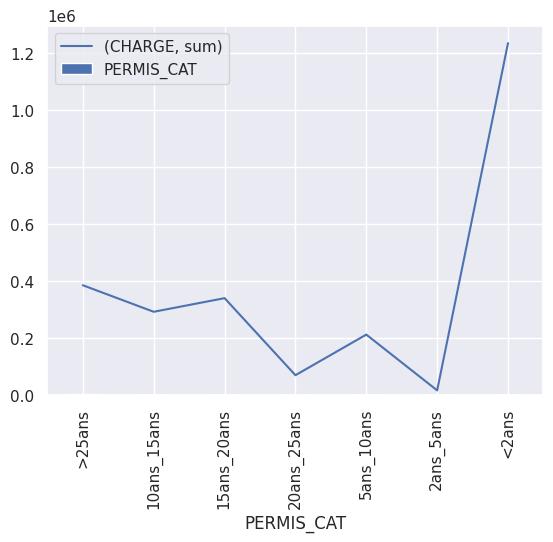

In [41]:
grouped_single = df.groupby('PERMIS_CAT').agg({'CHARGE': ['min', 'max', 'mean', 'sum', 'std', 'count']})
print(grouped_single)

ax = grouped_single[('CHARGE',  'sum')].plot()
df['PERMIS_CAT'].value_counts(normalize=False).plot(ax=ax, y='marks', kind='bar')
plt.legend()
plt.show()

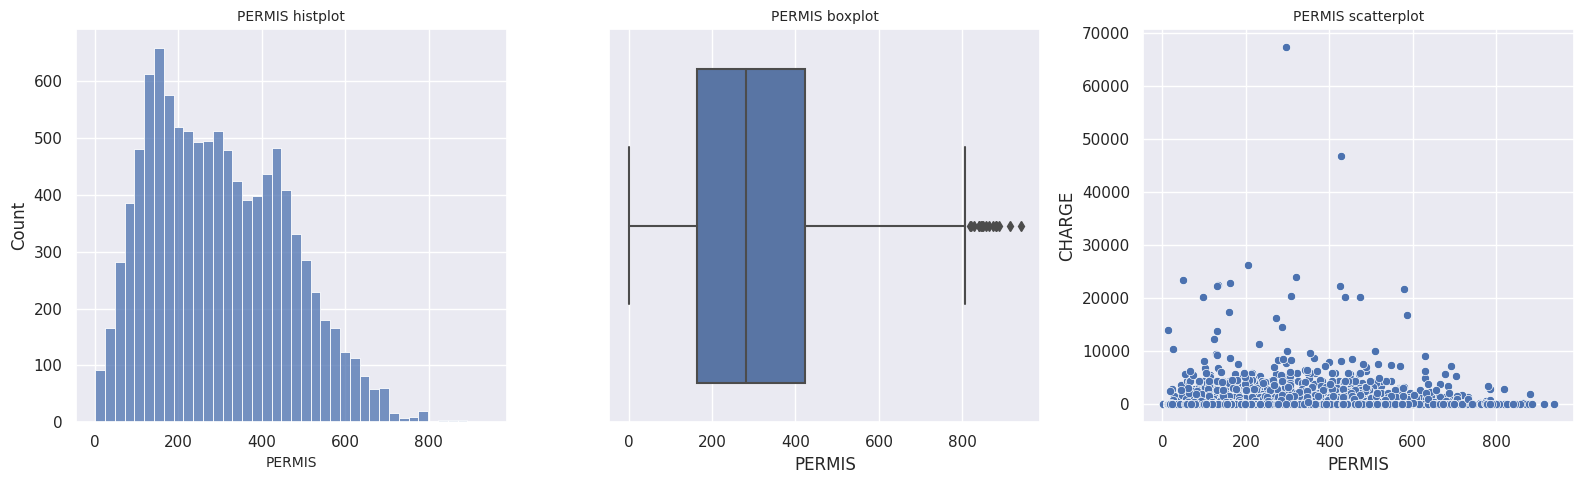

In [42]:
num_plot(df, 'PERMIS')

### Caractéristique `AGECOND`

In [43]:
def AGECONDTransform(age):
  if age <=21:
    return '<21'
  elif age >21 and age <=25:
    return '21_25'
  elif age >25 and age <=35:
    return '25_35'
  elif age >35 and age <=45:
    return '35_45'
  elif age >45 and age <=55:
    return '45_55'
  elif age >55 and age <=70:
    return '55_70'
  elif age >70:
    return '>70'

In [44]:
df['AGECOND_CAT'] = df['AGECOND'].apply(AGECONDTransform)

In [45]:
df.groupby(['AGECOND_CAT'])['CHARGE'].describe(percentiles=[])

,count,mean,std,min,50%,max
AGECOND_CAT,,,,,,
21_25,330.0,279.012420,1587.390391,0.0,0.0,23490.32447
25_35,2508.0,206.609146,1066.151084,0.0,0.0,22249.20544
35_45,2353.0,251.166619,1368.588407,0.0,0.0,26238.89366
45_55,2270.0,231.724856,1367.921218,0.0,0.0,46730.24773
55_70,2178.0,272.034648,1813.815095,0.0,0.0,67261.16737
<21,66.0,314.072466,1754.748933,0.0,0.0,13950.34713
>70,791.0,279.896846,1154.223618,0.0,0.0,21735.13595


            CHARGE                                                           
               min          max        mean            sum          std count
AGECOND_CAT                                                                  
21_25          0.0  23490.32447  279.012420   92074.098486  1587.390391   330
25_35          0.0  22249.20544  206.609146  518175.738677  1066.151084  2508
35_45          0.0  26238.89366  251.166619  590995.054081  1368.588407  2353
45_55          0.0  46730.24773  231.724856  526015.422048  1367.921218  2270
55_70          0.0  67261.16737  272.034648  592491.464054  1813.815095  2178
<21            0.0  13950.34713  314.072466   20728.782779  1754.748933    66
>70            0.0  21735.13595  279.896846  221398.404833  1154.223618   791


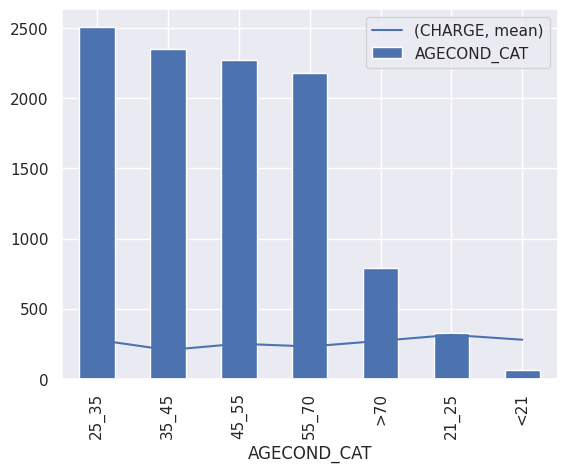

In [46]:
grouped_single = df.groupby('AGECOND_CAT').agg({'CHARGE': ['min', 'max', 'mean', 'sum', 'std', 'count']})
print(grouped_single)

ax = grouped_single[('CHARGE',  'mean')].plot()
df['AGECOND_CAT'].value_counts(normalize=False).plot(ax=ax, y='marks', kind='bar')
plt.legend()
plt.show()

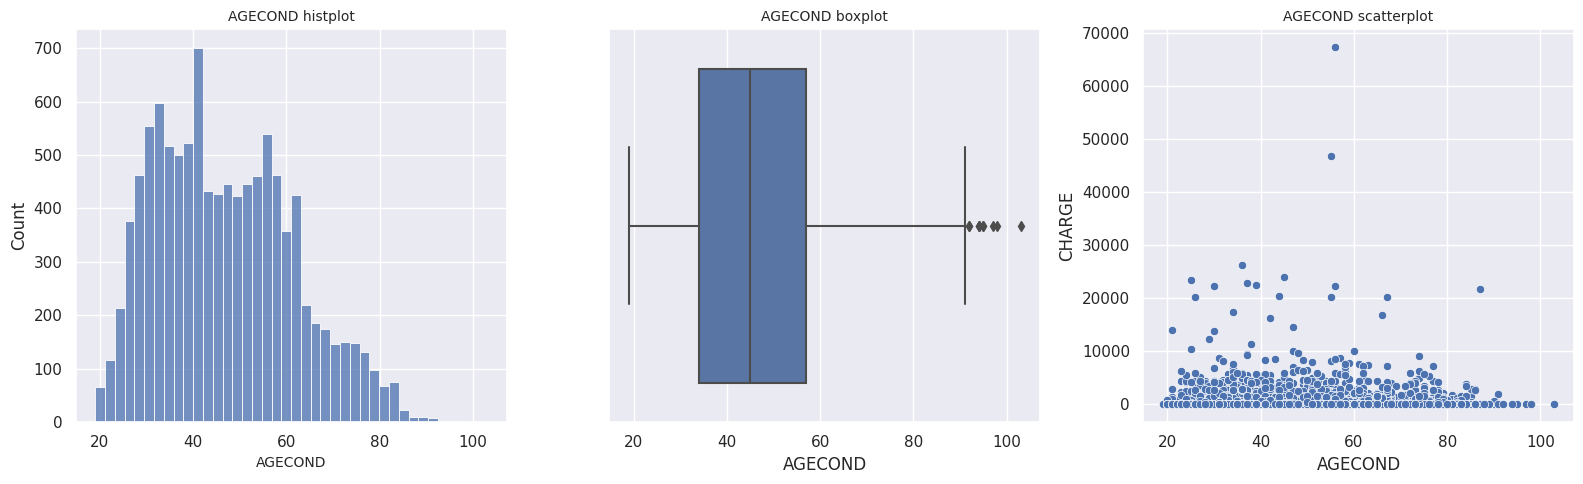

In [47]:
num_plot(df, 'AGECOND')

# Analyse des variables catégorielles

In [48]:
def cat_plot(df, col, rotation=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(16, 5))

    ax = sns.countplot(data=df, x=col, ax=ax1)
    ax.bar_label(ax.containers[0])
    ax1.set_title(col + ' countplot', fontsize=10)
    ax1.set_xlabel(col, fontsize=10)
    ax1.tick_params(axis='x', rotation=rotation)

    sns.boxplot(data=df, x=col, y='CHARGE')
    ax2.set_title(col + ' boxplot', fontsize=10)
    ax2.tick_params(axis='x', rotation=rotation)

    plt.savefig('ActuarialThesis/Plots/my'+col+'Plot'+'.pdf');
    plt.tight_layout()
    plt.show()

Caractéristique `SEX`

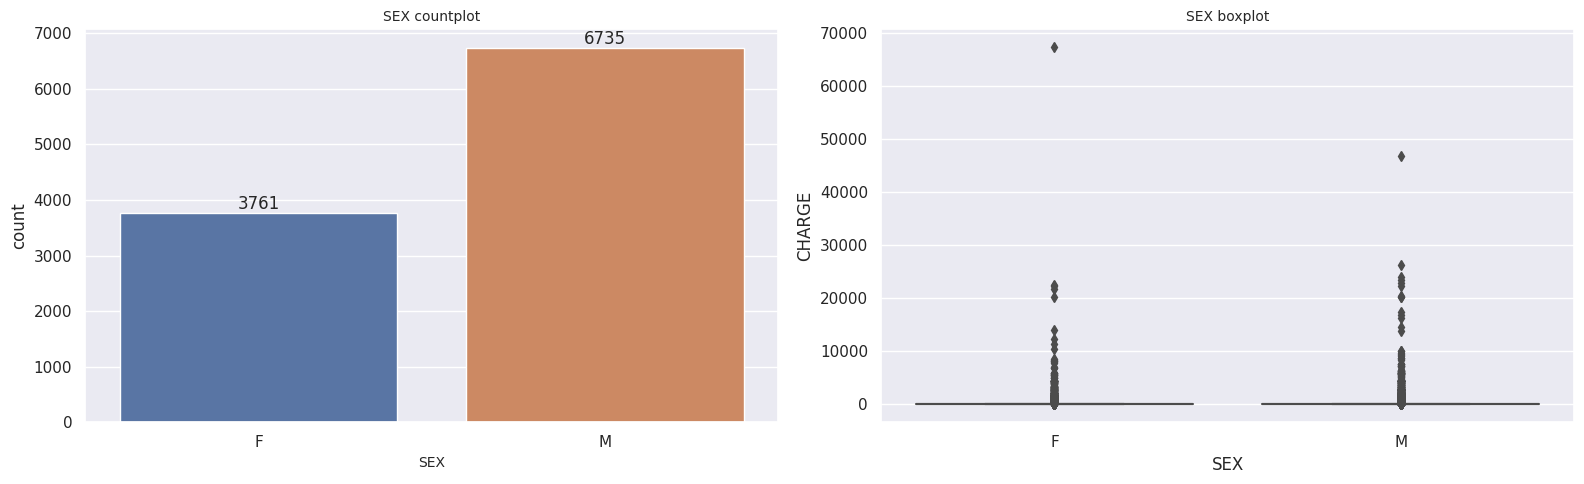

In [49]:
cat_plot(df, 'SEX')

In [50]:
def summary(x, total, size):
    result = {
        'CHARGE': x['CHARGE'].sum(),
        'mean': x['CHARGE'].mean(),
        'std': 100*x['CHARGE'].std(ddof=0),
        'count': 100*x['CHARGE'].count() /size,
        'percentage': 100*x['CHARGE'].sum() / total
    }
    return pd.Series(result).round(0)

In [51]:
df.groupby(['SEX']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
SEX,,,,,
F,939730.0,250.0,155096.0,36.0,37.0
M,1622149.0,241.0,131830.0,64.0,63.0


Caractéristique `USAGE`

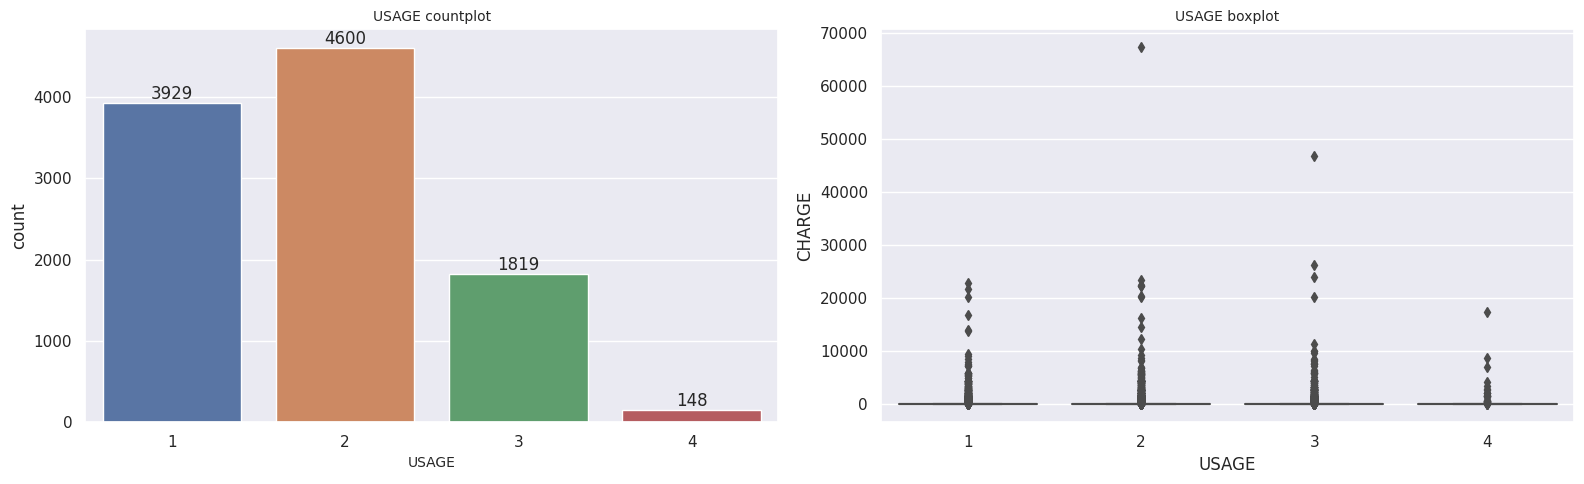

In [52]:
cat_plot(df, 'USAGE')

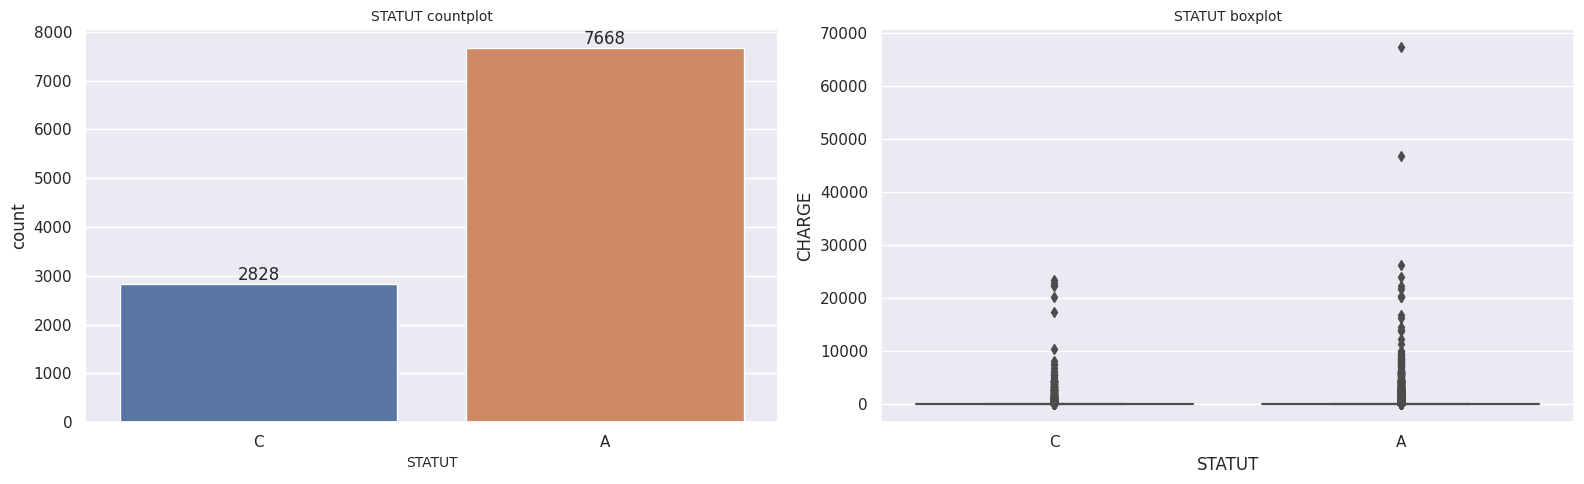

In [53]:
cat_plot(df, 'STATUT')

In [54]:
df.groupby(['STATUT']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
STATUT,,,,,
A,1972797.0,257.0,147079.0,73.0,77.0
C,589082.0,208.0,121276.0,27.0,23.0


Caractéristique `CAR`

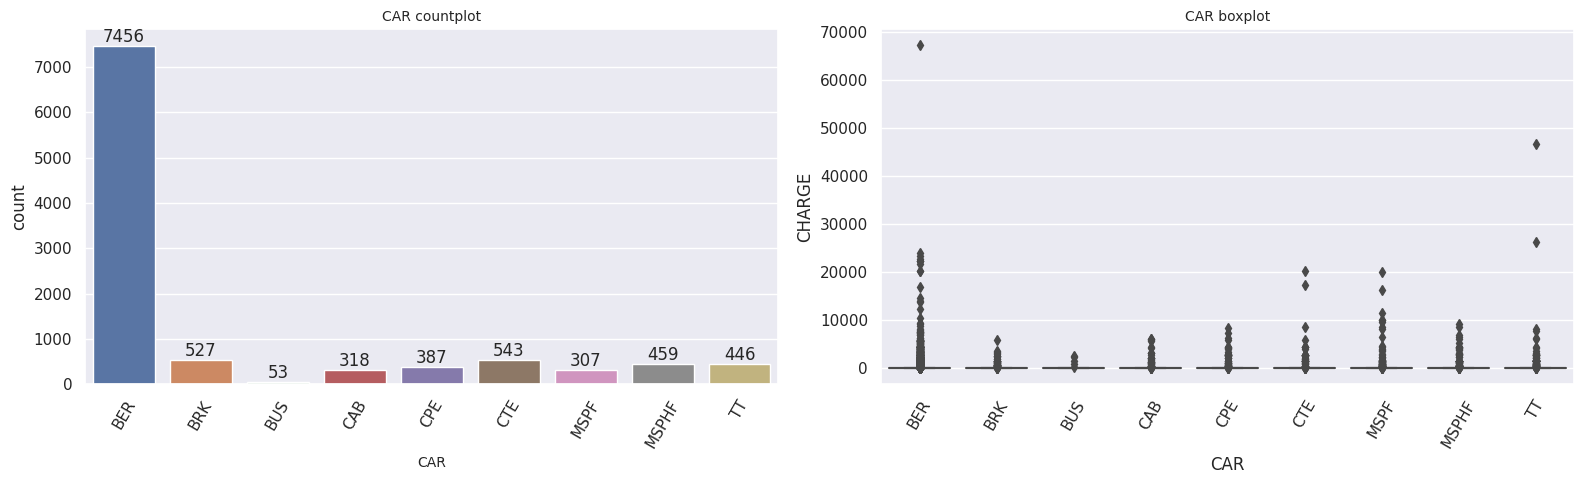

In [55]:
cat_plot(df, 'CAR', rotation=60)

In [56]:
df.groupby(['CAR']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
CAR,,,,,
BER,1669413.0,224.0,136432.0,71.0,65.0
BRK,62826.0,119.0,50414.0,5.0,2.0
BUS,7402.0,140.0,51120.0,1.0,0.0
CAB,74309.0,234.0,86582.0,3.0,3.0
CPE,106214.0,274.0,99255.0,4.0,4.0
CTE,128353.0,236.0,135332.0,5.0,5.0
MSPF,172027.0,560.0,209322.0,3.0,7.0
MSPHF,134780.0,294.0,105313.0,4.0,5.0
TT,206555.0,463.0,267527.0,4.0,8.0


Caractéristique `CLA`

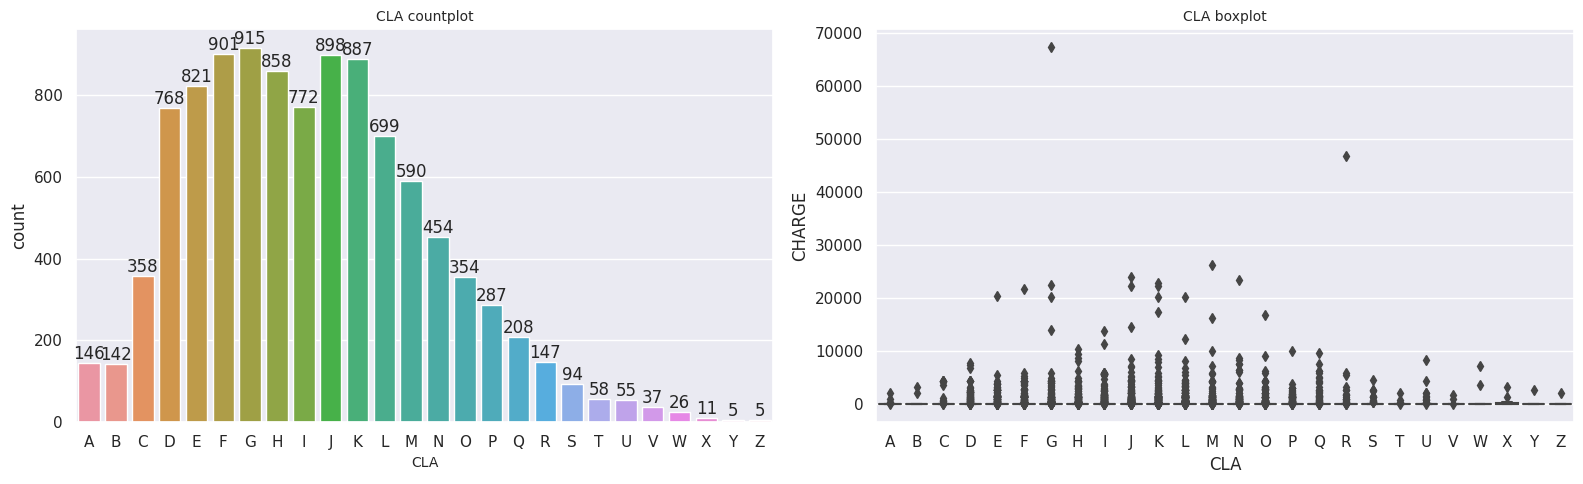

In [57]:
cat_plot(df, 'CLA')

In [58]:
df.groupby(['CLA']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
CLA,,,,,
A,4036.0,28.0,19996.0,1.0,0.0
B,5383.0,38.0,32573.0,1.0,0.0
C,29364.0,82.0,54506.0,3.0,1.0
D,104752.0,136.0,67380.0,7.0,4.0
E,144164.0,176.0,91604.0,8.0,6.0
F,169367.0,188.0,98345.0,9.0,7.0
G,252417.0,276.0,253980.0,9.0,10.0
H,153623.0,179.0,85001.0,8.0,6.0
I,186837.0,242.0,103939.0,7.0,7.0


Caractéristique `ALI`

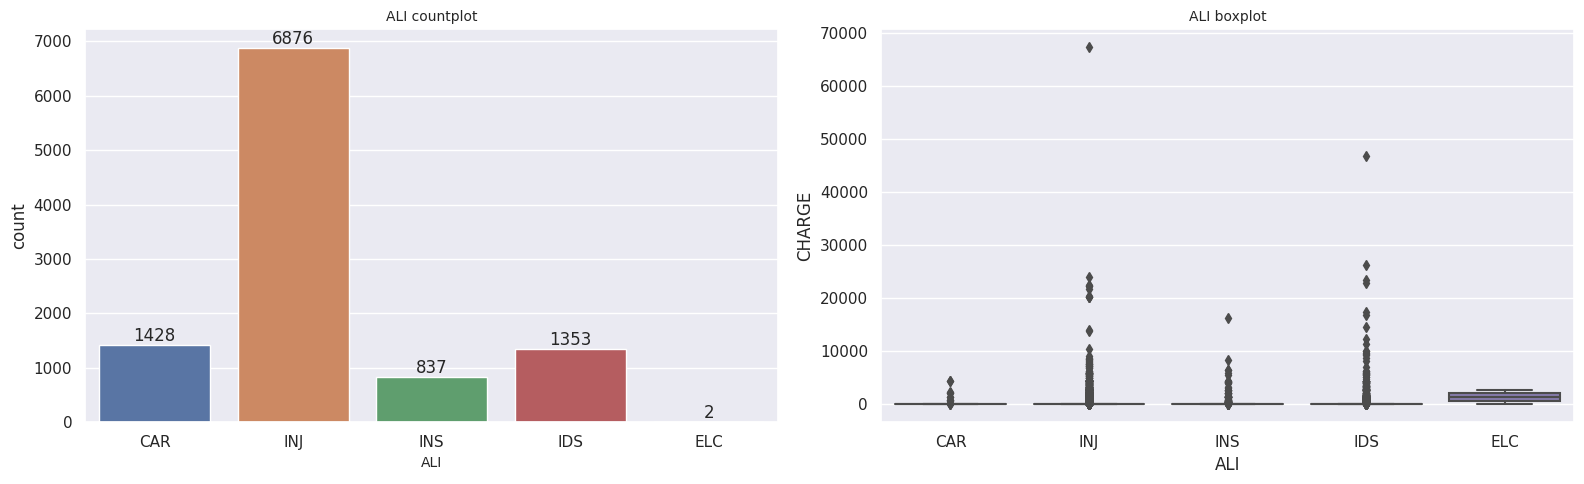

In [59]:
cat_plot(df, 'ALI')

In [60]:
df.groupby(['ALI']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
ALI,,,,,
CAR,20849.0,15.0,19980.0,14.0,1.0
ELC,2785.0,1393.0,139252.0,0.0,0.0
IDS,695964.0,514.0,219999.0,13.0,27.0
INJ,1695182.0,247.0,138896.0,66.0,66.0
INS,147099.0,176.0,91246.0,8.0,6.0


Caractéristique `ENE`

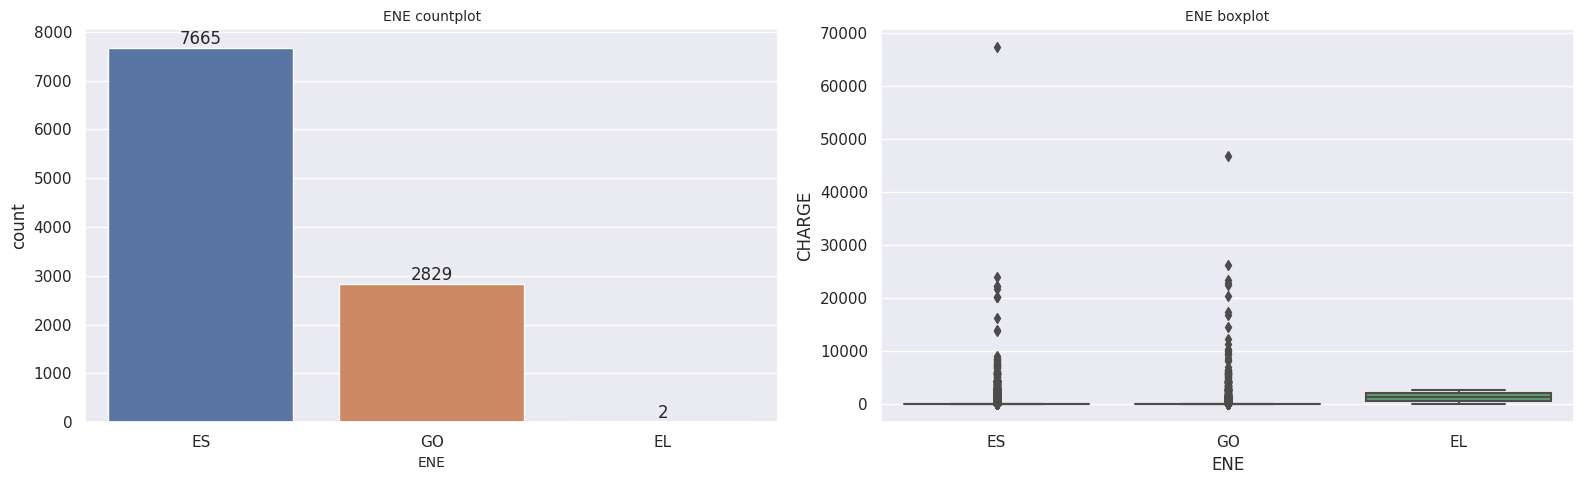

In [61]:
cat_plot(df, 'ENE')

Caractéristique `VIT`

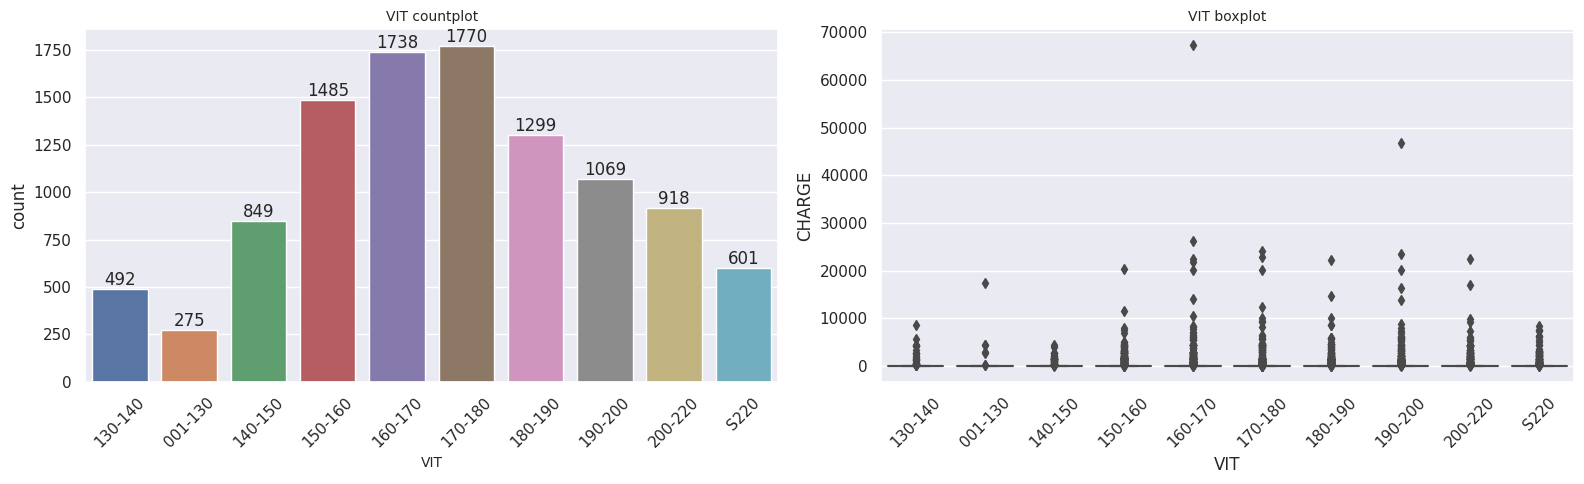

In [62]:
cat_plot(df, 'VIT', rotation=45)

Caractéristique `SEGM`

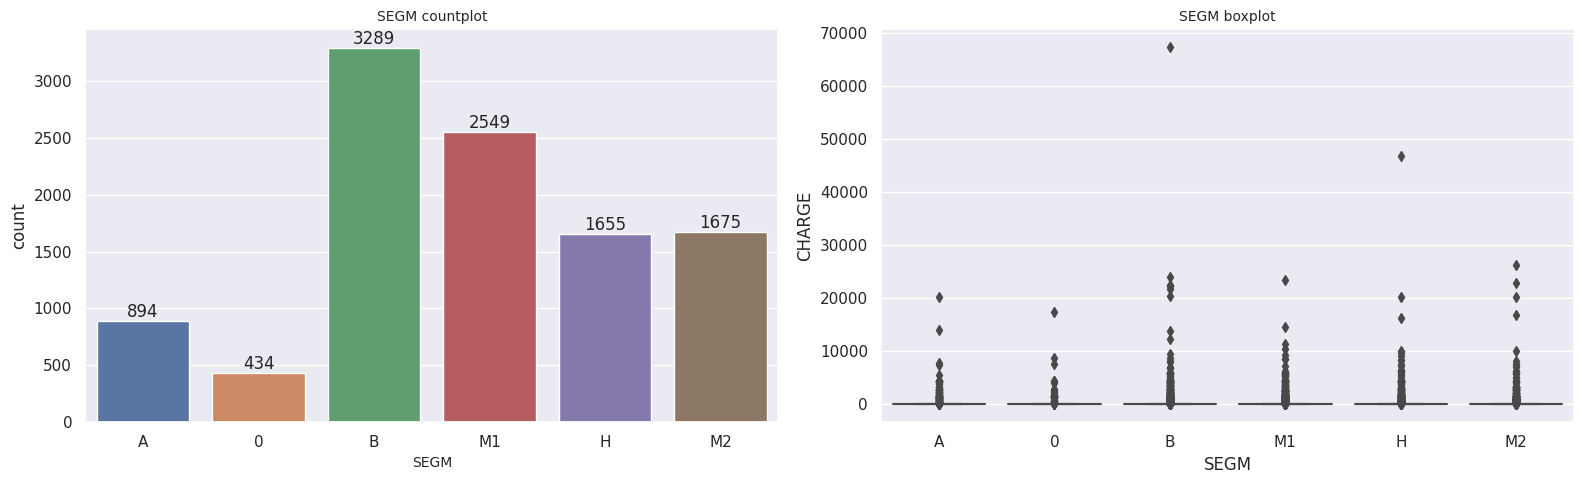

In [63]:
cat_plot(df, 'SEGM')

In [64]:
df.groupby(['SEGM']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
SEGM,,,,,
0,84521.0,195.0,111504.0,4.0,3.0
A,219821.0,246.0,111407.0,9.0,9.0
B,832555.0,253.0,171054.0,31.0,32.0
H,475846.0,288.0,158946.0,16.0,19.0
M1,538132.0,211.0,97550.0,24.0,21.0
M2,411003.0,245.0,130793.0,16.0,16.0


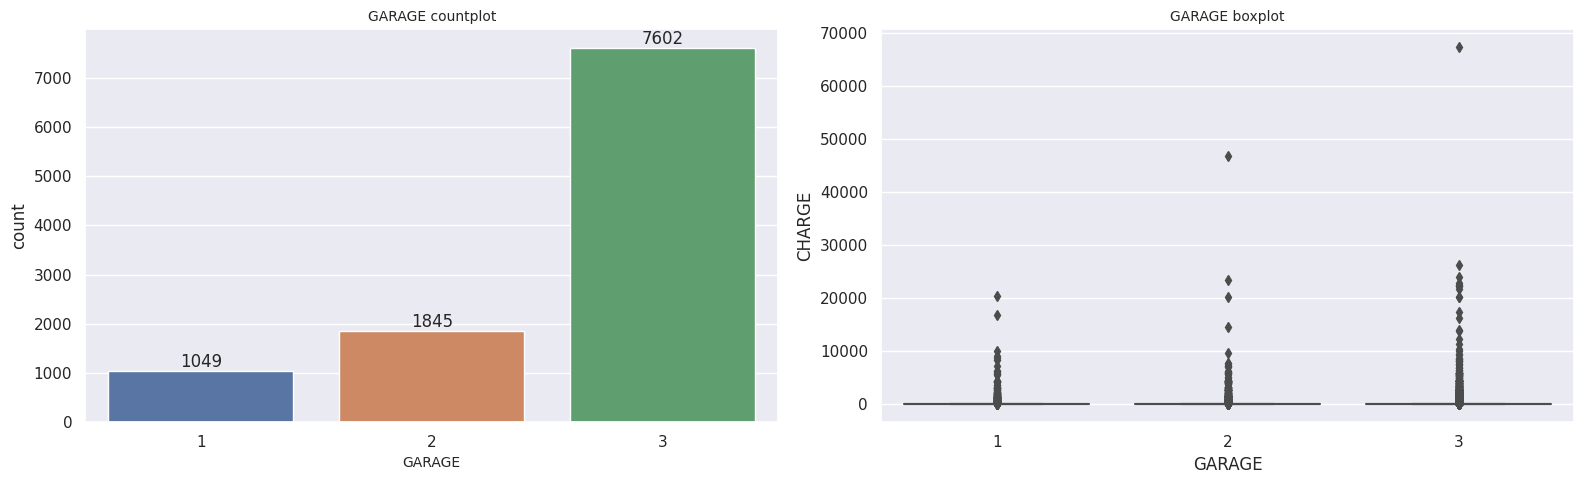

In [65]:
cat_plot(df, 'GARAGE')

In [66]:
df.groupby(['GARAGE']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
GARAGE,,,,,
1,295361.0,282.0,122324.0,10.0,12.0
2,566880.0,307.0,159719.0,18.0,22.0
3,1699638.0,224.0,137936.0,72.0,66.0


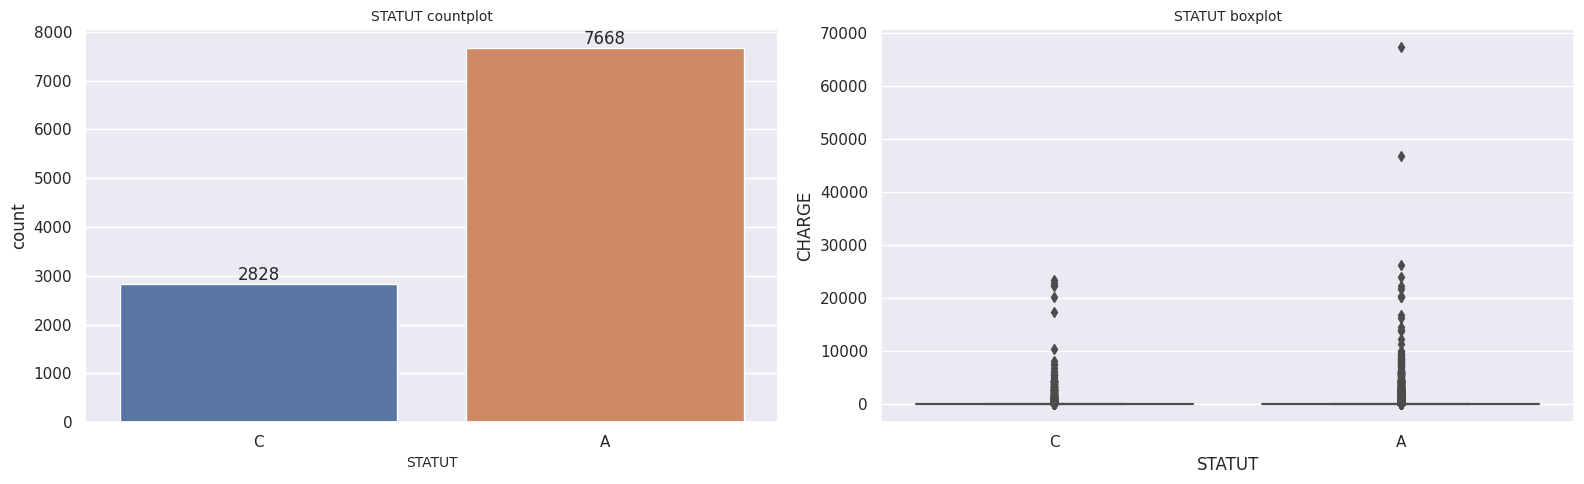

In [67]:
cat_plot(df, 'STATUT')

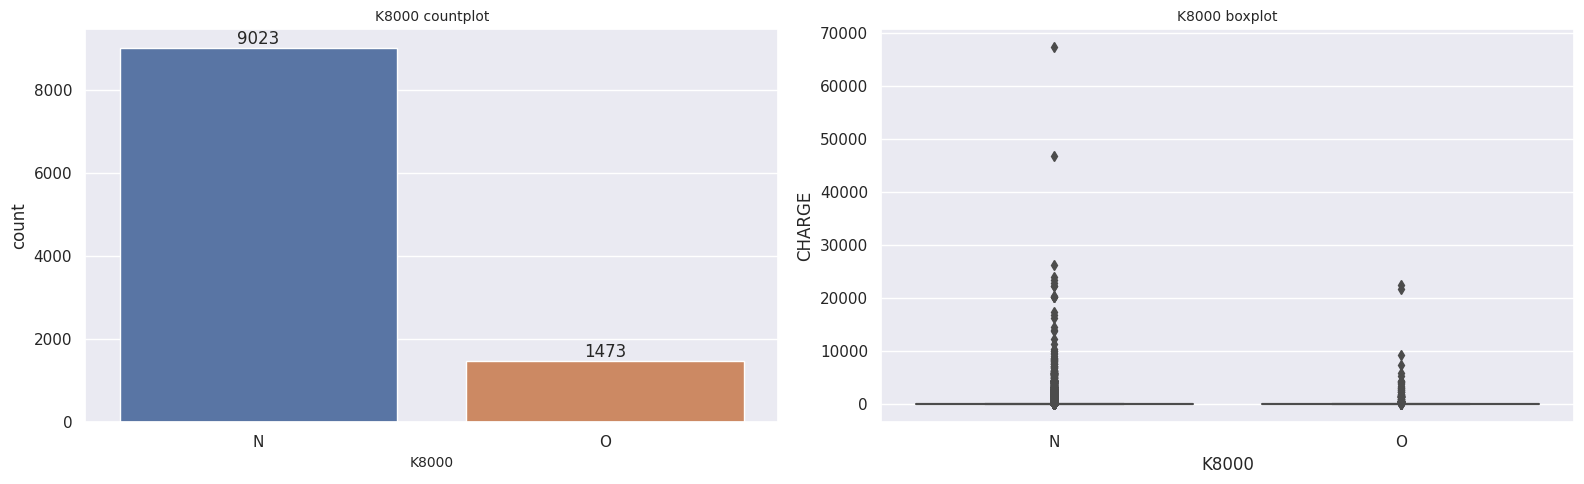

In [68]:
cat_plot(df, 'K8000')

In [69]:
df.groupby(['K8000']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
K8000,,,,,
N,2377647.0,264.0,146304.0,86.0,93.0
O,184232.0,125.0,97982.0,14.0,7.0


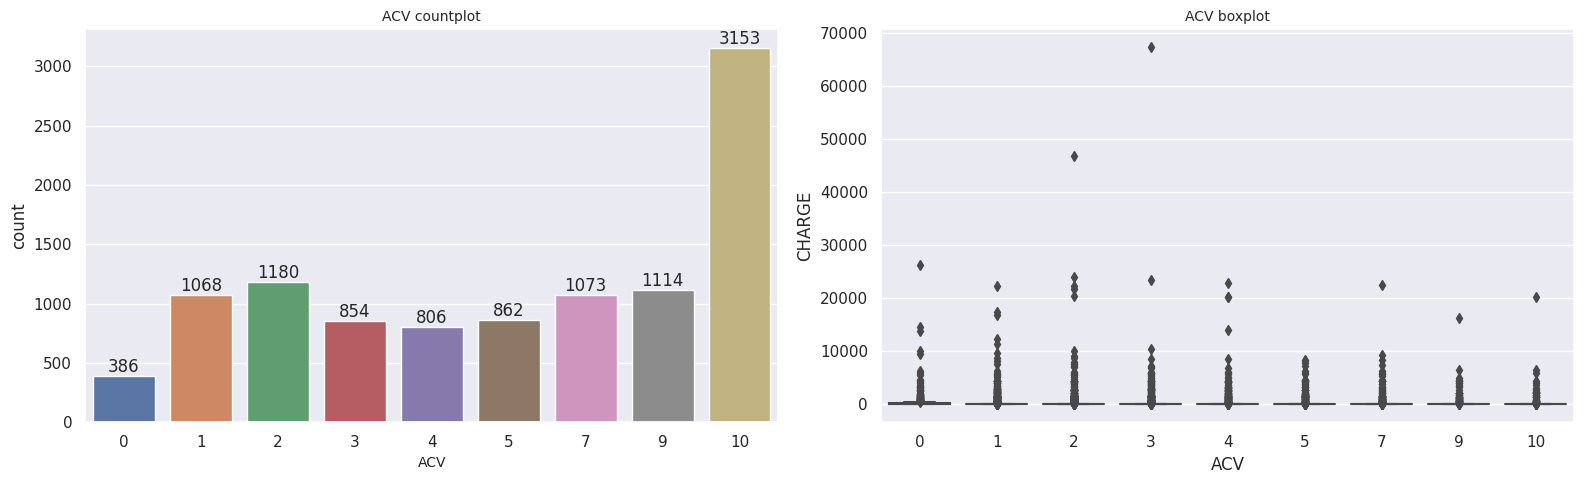

In [70]:
cat_plot(df, 'ACV')

In [71]:
df.groupby(['ACV']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
ACV,,,,,
0,217037.0,562.0,200570.0,4.0,8.0
1,420828.0,394.0,147701.0,10.0,16.0
2,529452.0,449.0,211653.0,11.0,21.0
3,422287.0,494.0,266419.0,8.0,16.0
4,315321.0,391.0,163478.0,8.0,12.0
5,224269.0,260.0,90451.0,8.0,9.0
7,210899.0,197.0,103207.0,10.0,8.0
9,122199.0,110.0,70169.0,11.0,5.0
10,99587.0,32.0,44426.0,30.0,4.0


In [72]:
df['CSP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10496 entries, 0 to 10495
Series name: CSP
Non-Null Count  Dtype 
--------------  ----- 
10496 non-null  object
dtypes: object(1)
memory usage: 82.1+ KB


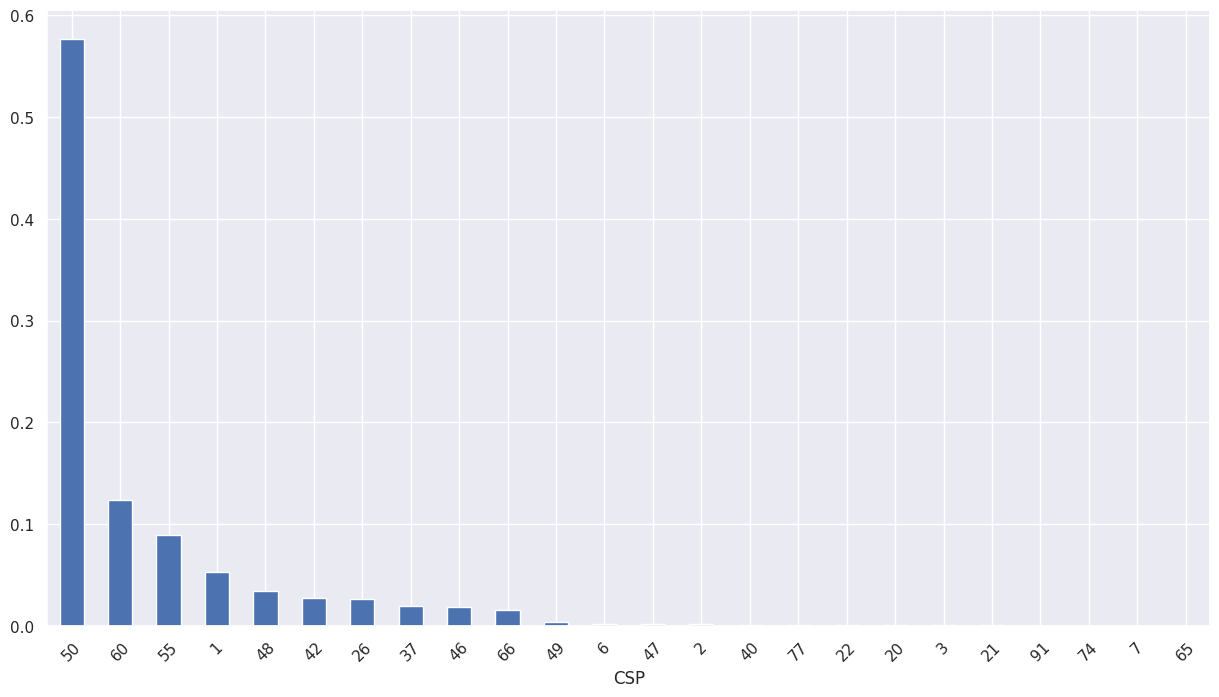

In [73]:
col='CSP'
plt.figure(figsize=(15, 8))
df[col].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel(col)
plt.savefig('ActuarialThesis/Plots/my'+col+'Plot'+'.pdf');

In [74]:
df[df['CSP']==74]

,PERMIS,ACV,SEX,STATUT,CSP,USAGE,AGECOND,K8000,RM,CAR,CLA,ALI,ENE,VIT,SEGM,CHARGE,GARAGE,PERMIS_CAT,AGECOND_CAT
1631,122,7,F,C,74,3,29,N,118,BER,E,INJ,ES,160-170,B,95.991843,3,10ans_15ans,25_35


In [75]:
df[df['CSP']==65]

,PERMIS,ACV,SEX,STATUT,CSP,USAGE,AGECOND,K8000,RM,CAR,CLA,ALI,ENE,VIT,SEGM,CHARGE,GARAGE,PERMIS_CAT,AGECOND_CAT
5488,433,9,M,A,65,3,54,N,50,BER,K,INJ,ES,170-180,B,3651.790332,1,>25ans,45_55


In [76]:
df[df['CSP']==74]['CHARGE'].mean(), df[df['CSP']==74]['CHARGE'].std(ddof=0)

(95.9918429, 0.0)

In [77]:
def summary(x, total, size):
    result = {
        'CHARGE': x['CHARGE'].sum(),
        'mean': x['CHARGE'].mean(),
        'std': 100*x['CHARGE'].std(),
        'count': 100*x['CHARGE'].count() /size,
        'percentage': 100*x['CHARGE'].sum() / total
    }
    return pd.Series(result).round(0)

In [78]:
df.groupby(['CSP']).apply(summary, df['CHARGE'].sum(), len(df))

,CHARGE,mean,std,count,percentage
CSP,,,,,
1,216202.0,389.0,243767.0,5.0,8.0
2,97.0,7.0,2601.0,0.0,0.0
3,92.0,13.0,3462.0,0.0,0.0
6,8426.0,443.0,73410.0,0.0,0.0
7,0.0,0.0,NaN,0.0,0.0
20,420.0,47.0,12001.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0
22,542.0,54.0,17153.0,0.0,0.0
26,92677.0,337.0,167982.0,3.0,4.0


La variable `AGECOND`, âge du conducteur, peut être passée au modèles d'apprentissage comme une variable continue ou une variable catégorique. On considère le split suivant pour la transformer en une variable catégorique.

In [79]:
# Grouper les conducteurs par catégories d'ages
def AgeSplit(age):
    if age <=18:
        return '<18'
    elif age>18 and age<=21:
        return '18_21'
    elif age>21 and age<=25:
        return '21_25'
    elif age>25 and age<=35:
        return '25_35'
    elif age>35 and age<=45:
        return '35_45'
    elif age>45 and age<=55:
        return '45_55'
    elif age>55 and age<=70:
        return '55_70'
    else:
        return '>70'

In [80]:
df['AGECOND_CAT'] = df['AGECOND'].apply(AgeSplit)
df['AGECOND_CAT']

0        35_45
1        55_70
2        18_21
3        55_70
4        25_35
         ...  
10491    25_35
10492    25_35
10493    45_55
10494    45_55
10495    35_45
Name: AGECOND_CAT, Length: 10496, dtype: object

In [81]:
df['AGECOND_CAT'].unique()

array(['35_45', '55_70', '18_21', '25_35', '45_55', '>70', '21_25'],
      dtype=object)

In [82]:
#sns.stripplot(data = df,
#              x='AGECOND_CAT', y='CHARGE',
#              order = ['18_21', '21_25', '25_35', '35_45', '45_55', '55_70', '>70'],
#              jitter=False);

In [83]:
#sns.scatterplot(y='CHARGE', x='CLA', data=df, hue='AGECOND_CAT')
#plt.show()

In [84]:
df.groupby('AGECOND_CAT')['CHARGE'].sum()

AGECOND_CAT
18_21     20728.782779
21_25     92074.098486
25_35    518175.738677
35_45    590995.054081
45_55    526015.422048
55_70    592491.464054
>70      221398.404833
Name: CHARGE, dtype: float64

In [85]:
grouped_single = df.groupby('AGECOND_CAT').agg({'CHARGE': ['min', 'max', 'mean', 'sum', 'std', 'count']})
print(grouped_single)

            CHARGE                                                           
               min          max        mean            sum          std count
AGECOND_CAT                                                                  
18_21          0.0  13950.34713  314.072466   20728.782779  1754.748933    66
21_25          0.0  23490.32447  279.012420   92074.098486  1587.390391   330
25_35          0.0  22249.20544  206.609146  518175.738677  1066.151084  2508
35_45          0.0  26238.89366  251.166619  590995.054081  1368.588407  2353
45_55          0.0  46730.24773  231.724856  526015.422048  1367.921218  2270
55_70          0.0  67261.16737  272.034648  592491.464054  1813.815095  2178
>70            0.0  21735.13595  279.896846  221398.404833  1154.223618   791


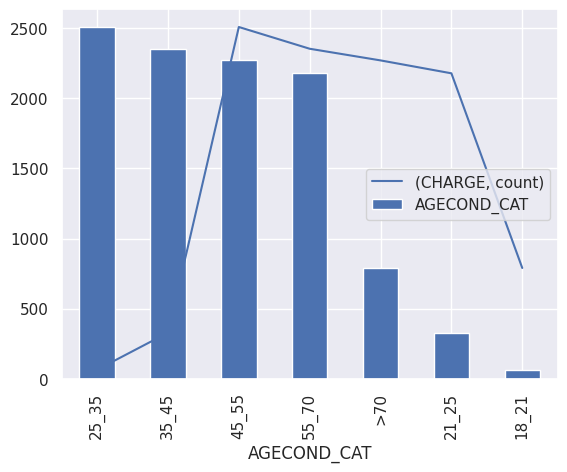

In [86]:
ax = grouped_single[('CHARGE',  'count')].plot()
df['AGECOND_CAT'].value_counts(normalize=False).plot(ax=ax, x='AGECOND_CAT', y='marks', kind='bar')
plt.legend()
plt.show();

In [87]:
grouped_single.columns

MultiIndex([('CHARGE',   'min'),
            ('CHARGE',   'max'),
            ('CHARGE',  'mean'),
            ('CHARGE',   'sum'),
            ('CHARGE',   'std'),
            ('CHARGE', 'count')],
           )

In [88]:
grouped_single = df.groupby('CAR').agg({'CHARGE': ['min', 'max', 'mean', 'median', 'std', 'count']})
print(grouped_single)

      CHARGE                                                    
         min           max        mean median          std count
CAR                                                             
BER      0.0  67261.167370  223.902019    0.0  1364.410628  7456
BRK      0.0   5904.152266  119.215285    0.0   504.621851   527
BUS      0.0   2576.120846  139.661039    0.0   516.090165    53
CAB      0.0   6030.048036  233.675019    0.0   867.189123   318
CPE      0.0   8449.273414  274.453659    0.0   993.835623   387
CTE      0.0  20363.808760  236.377977    0.0  1354.566482   543
MSPF     0.0  20157.038070  560.347373    0.0  2096.637276   307
MSPHF    0.0   9252.437764  293.639024    0.0  1054.283487   459
TT       0.0  46730.247730  463.126915    0.0  2678.269262   446


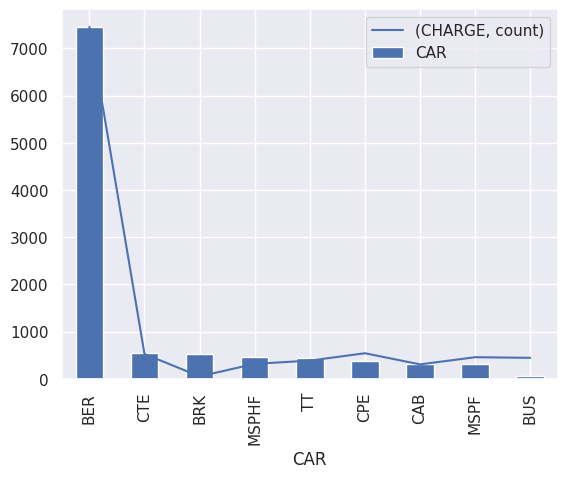

In [89]:
ax = grouped_single[('CHARGE',  'count')].plot()
df['CAR'].value_counts(normalize=False).plot(ax=ax, y='marks', kind='bar')
plt.legend()
plt.show()

In [90]:
grouped_single[('CHARGE',  'mean')]

CAR
BER      223.902019
BRK      119.215285
BUS      139.661039
CAB      233.675019
CPE      274.453659
CTE      236.377977
MSPF     560.347373
MSPHF    293.639024
TT       463.126915
Name: (CHARGE, mean), dtype: float64